In [1]:
## development environment
# keras=2.2.0
# tensorflow=1.8.0
# dask=0.18.1
import keras
import tensorflow as tf
import dask

import warnings
warnings.filterwarnings('ignore')

print("keras={}".format(keras.__version__))
print("tensorflow={}".format(tf.__version__))
print("dask={}".format(dask.__version__))

Using TensorFlow backend.


keras=2.2.4
tensorflow=1.13.1
dask=1.1.4


In [2]:
from keras.models import Sequential
from keras.layers import Dense

In [55]:
# データのインポート
import dataset

X, Y = dataset.load_data()

In [4]:
# 可視化用ライブラリの読み込み
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Keras関連
from keras.utils import np_utils
from keras import backend as K
from keras.layers import Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Activation
from keras import regularizers
from keras.optimizers import SGD, Adadelta, Adam, RMSprop# 最適化手法
import time

In [5]:
# type1だけにしている
y=Y[0]

x_train=X[0:700]
x_test=X[700:]

y_train=y[0:700]
y_test=y[700:]

In [6]:
# ラベル名を用意
type_labels = np.array([
    "Normal",
    "Fire",
    "Water",
    "Electric",
    "Grass",
    "Ice",
    "Fighting",
    "Poison",
    "Ground",
    "Flying",
    "Psychic",
    "Bug",
    "Rock",
    "Ghost",
    "Dragon",
    "Dark",
    "Steel",
    "Fairy"])

In [7]:
img_rows, img_cols = 64, 64
img_channels = 4
nb_classes = 18 # 正解のパターン数

In [8]:
# # 各ラベルごとに画像を10枚格納
# img_list = []
# for for_1 in range(3):
#     choice_idx = np.random.choice(np.where(y_test == for_1)[0], 10)
#     img_list.append(x_test[choice_idx])

In [9]:
# # データの可視化
# for for_1 in range(3):
#     fig, ax = plt.subplots(1, 10, figsize=(18, 8))
#     for for_2 in range(10):
#         ax[for_2].imshow(img_list[for_1][for_2].reshape(img_rows, img_cols, img_channels)) #for_2の値+nでn番目以降のテストデータを出力する．
#         ax[for_2].set_title(type_labels[for_1])
#         ax[for_2].axis('off')

In [8]:
x_train = x_train.astype(np.float32) / 255.
x_test = x_test.astype(np.float32) / 255.

In [9]:
nb_classes = 18 # 正解のパターン数

In [10]:
from keras.utils import np_utils
# クラスベクトルをバイナリクラスの行列に変換する
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [11]:
# backendの違いによる次元数の入力型の調整(おまじない)
from keras import backend as K

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], img_channels, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], img_channels, img_rows, img_cols)
    input_shape = (img_channels, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, img_channels)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, img_channels)
    input_shape = (img_rows, img_cols, img_channels)

In [13]:
from keras.layers import Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Activation
from keras import regularizers

In [19]:
"""
model.add()の中にConv2DやMaxPooling2Dをいれてモデルを作ってみよう

サンプルで使用している関数一覧
---
# データの一次元配列化
    model.add(Flatten()) # 全結合層につなげる直前に使おう
# 全結合層
    model.add(Dense(次元数, activation=活性化関数)) 
# 畳み込み層
    model.add(Conv2D(次元数, kernel_size=フィルターのサイズ,activation=活性化関数,input_shape=input_shape))
# プーリング層
    model.add(MaxPooling2D(pool_size=プーリングするサイズ))
# ドロップアウト
model.add(Dropout(0から1までの数値)) # 学習するパーセプトロンのうち使用しない割合を設定
---

その他、調べてみて便利な関数があればぜひ追加してみよう
"""

weight_decay = 1e-4
model = Sequential()

model.add(Conv2D(32, (2,2), padding='same', activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (2,2), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))


model.add(Conv2D(128, (2,2), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (2,2), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))


model.add(Conv2D(256, (2,2), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, (2,2), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dense(18, activation='softmax'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 64, 64, 32)        544       
_________________________________________________________________
batch_normalization_19 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 64, 64, 64)        8256      
_________________________________________________________________
batch_normalization_20 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 128)       32896     
__________

In [21]:
from keras.optimizers import SGD, Adadelta, Adam, RMSprop# 最適化手法
from keras import optimizers

"""
モデルを評価する関数をmodel.compile()で定義しよう

実際にmodel.compileの中にはこのようにします

model.compile(loss=誤差関数,
             optimizer=最適化関数,
             metrics=['accuracy']
             )
             
誤差関数　モデルの精度の悪さを表す指標　誤差逆伝播時にパラメータの更新方向を決定する数値
・categorical_crossentropy

最適化関数(好きなものを選ぼう)　誤差逆伝播時にパラメータを更新する手法
・SGD
・Adadelta
・Adam
  Adamは最近主流になっている最適化関数。一般的にSGDよりも優秀(例外はある)。
・RMSprop

評価指標
・accuracy
"""
# 損失関数
def categorical_loss(y_true, y_pred):
    return K.categorical_crossentropy(y_true, y_pred)

# 評価関数
def total_acc(y_true, y_pred):
    pred = K.cast(K.greater_equal(y_pred, 0.5), "float")
    flag = K.cast(K.equal(y_true, pred), "float")
    return K.prod(flag, axis=-1)

def binary_acc(y_true, y_pred):
    pred = K.cast(K.greater_equal(y_pred, 0.5), "float")
    flag = K.cast(K.equal(y_true, pred), "float")
    return K.mean(flag, axis=-1)


model.compile(loss=categorical_loss, # 誤差(損失)関数
              optimizer="Adam", # 最適化関数
              metrics=[total_acc, binary_acc] # 評価指標
             )

In [51]:
def get_model():
    
    weight_decay = 1e-4
    model = Sequential()

    model.add(Conv2D(64, (2,2), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64, (2,2), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))


    model.add(Conv2D(128, (2,2), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128, (2,2), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))


    model.add(Conv2D(256, (2,2), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(256, (2,2), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))


    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(18, activation='softmax'))
    
    return model

In [ ]:
from sklearn.model_selection import KFold
import keras.backend as K


kf = KFold(n_splits=8, shuffle=False)

score_average = []
accuracy_average = []

# 損失関数
def categorical_loss(y_true, y_pred):
    return K.categorical_crossentropy(y_true, y_pred)

# 評価関数
def total_acc(y_true, y_pred):
    pred = K.cast(K.greater_equal(y_pred, 0.5), "float")
    flag = K.cast(K.equal(y_true, pred), "float")
    return K.prod(flag, axis=-1)

def binary_acc(y_true, y_pred):
    pred = K.cast(K.greater_equal(y_pred, 0.5), "float")
    flag = K.cast(K.equal(y_true, pred), "float")
    return K.mean(flag, axis=-1)

for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    
    Y_train = np_utils.to_categorical(Y_train, nb_classes)
    Y_test = np_utils.to_categorical(Y_test, nb_classes)
    
    if K.image_data_format() == 'channels_first':
        X_train = X_train.reshape(X_train.shape[0], img_channels, img_rows, img_cols)
        X_test = X_test.reshape(xX_test.shape[0], img_channels, img_rows, img_cols)
        input_shape = (img_channels, img_rows, img_cols)
    else:
        X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, img_channels)
        X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, img_channels)
        input_shape = (img_rows, img_cols, img_channels)
    
    model = get_model()
    
    model.compile(loss=categorical_loss, # 誤差(損失)関数
              optimizer=optimizers.RMSprop(lr=1e-4), # 最適化関数
              metrics=[total_acc, binary_acc] # 評価指標
             )
    
    history = model.fit(X_train, Y_train,
                    batch_size=32,
                    nb_epoch=5,
                    verbose=1,
                    validation_data=(X_test, Y_test)
                   )
    
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0]) # 損失関数の値
    score_average.append(score[0])
    print('Test accuracy:', score[1]) # 精度(98%強)
    accuracy_average.append(score[1])
    
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].set_title('Training performance (Loss)')
    ax[0].plot(history.epoch, history.history['loss'], label='loss')
    ax[0].plot(history.epoch, history.history['val_loss'], label='val_loss')
    ax[0].set(xlabel='Epoch', ylabel='Loss')
    ax[0].legend()

    ax[1].set_title('Training performance (Accuracy)')
    ax[1].plot(history.epoch, history.history['total_acc'], label='acc')
    ax[1].plot(history.epoch, history.history['val_total_acc'], label='val_acc')
    ax[1].set(xlabel='Epoch', ylabel='Accuracy')
    ax[1].legend(loc='best')

print("test score average:", np.mean(score_average))
print("test accuracy average:", np.mean(accuracy_average))

In [16]:
#モデルの保存
json_string = model.model.to_json()
open('predict.json', 'w').write(json_string)

#重みの保存
hdf5_file = "predict.hdf5"
model.model.save_weights(hdf5_file)

In [47]:
# img = Image.open("../../data/images/0001.png")
img = Image.open("kajirigame.png")
img = img.convert("RGBA")
img = img.resize((64,64))
img = np.array(img)
img = img.astype(np.float32) / 255.
img.shape

(64, 64, 4)

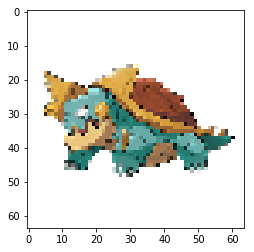

In [48]:
ax = plt.subplot()
ax.imshow(img)

In [29]:
#綾鷹を選ばせるプログラム
from keras import models
from keras.models import model_from_json
from keras.preprocessing import image
import numpy as np

#保存したモデルの読み込み
model = model_from_json(open('predict.json').read())
#保存した重みの読み込み
model.load_weights('predict.hdf5')

# categories = type_labels

#画像を読み込む
img = Image.open("/workspace/data/images/0801.png")
img = img.resize((64,64))
x = np.array(img)
x = np.expand_dims(x, axis=0)

#予測
features = model.predict(x)

print(type_labels[np.argmax(features)])

# #予測結果によって処理を分ける
# if features[0,0] == 1:
#     print ("選ばれたのは、綾鷹でした。")

# elif features[0,4] == 1:
#     print ("選ばれたのは、綾鷹（茶葉のあまみ）でした。")

# else:
#     for i in range(0,10):
#           if features[0,i] == 1:
#               cat = categories[i]
#     message = "綾鷹を選んでください。（もしかして：あなたが選んでいるのは「" + cat + "」ではありませんか？）"
#     print(message)


Poison


In [28]:
for i in range(10):
    # 予測値
    # 各ラベルごとに画像を18枚格納
    New_test = []
    for for_1 in range(18):
        choice_idx = np.random.choice(np.where(y_test == for_1)[0])
        New_test.append(x_test[choice_idx])
    New_test = np.array(New_test)
    # 画像のラベルを推定する
    y_test_pred = model.predict(New_test)

    # データの可視化
    # 上段は正しいラベル　下段は推測ラベル
    fig, ax = plt.subplots(1, 18, figsize=(18, 8))
    for for_1 in range(18):
        ax[for_1].imshow(New_test[for_1].reshape(64, 64, 4)) #for_2の値+nでn番目以降のテストデータを出力する．
        ax[for_1].set_title(type_labels[for_1]+"\n"+type_labels[np.argmax(y_test_pred[for_1])])
        ax[for_1].axis('off')

ValueError: 'a' cannot be empty unless no samples are taken

In [ ]:
# # データの可視化
# # 上段は正しいラベル　下段は推測ラベル
# fig, ax = plt.subplots(1, 18, figsize=(18, 8))
# for for_1 in range(18):
#     ax[for_1].imshow(New_test[for_1].reshape(64, 64, 4)) #for_2の値+nでn番目以降のテストデータを出力する．
#     ax[for_1].set_title(type_labels[for_1]+"\n"+type_labels[np.argmax(y_test_pred[for_1])])
#     ax[for_1].axis('off')

In [11]:
predict = model.predict(x_test)

In [1]:
for i in range(1):
    print(type_labels[np.argmax(predict[i])])

NameError: name 'type_labels' is not defined

In [23]:
# 学習を実行
# 学習途中の損失関数の値などはhistory.historyに保存される。
# CIFAR-10のようにカラー画像ともなると学習時間が多くなってしまう……
# 今回は学習を早く終わらせるために学習に使用するデータの数を[:1024]と少なくしている。
# 精度を重視するならX_train[:1024]をX_trainとし全てのデータを使用すべき。
# ここでエラーが吐かれる場合、jupyterのrestart the kernelのボタンを押して最初から動かしてみるなど。

history = model.fit(x_train, y_train,
                    batch_size=32,  # 512個ランダムに得る
                    nb_epoch=3, # 試行回数
                    verbose=1,
                    validation_data=(x_test, y_test)
                   )

Instructions for updating:
Use tf.cast instead.
Train on 700 samples, validate on 101 samples
Epoch 1/3
700/700 [==============================] - 28s 39ms/step - loss: 13.7140 - total_acc: 0.1186 - binary_acc: 0.9028 - val_loss: 14.2031 - val_total_acc: 0.1188 - val_binary_acc: 0.9021
Epoch 2/3
700/700 [==============================] - 20s 29ms/step - loss: 13.9767 - total_acc: 0.1329 - binary_acc: 0.9037 - val_loss: 14.2031 - val_total_acc: 0.1188 - val_binary_acc: 0.9021
Epoch 3/3
700/700 [==============================] - 19s 27ms/step - loss: 13.9767 - total_acc: 0.1329 - binary_acc: 0.9037 - val_loss: 14.2031 - val_total_acc: 0.1188 - val_binary_acc: 0.9021


In [ ]:
# テストデータに対する評価値
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0]) # 損失関数の値
print('Test accuracy:', score[1]) # 精度(98%強)

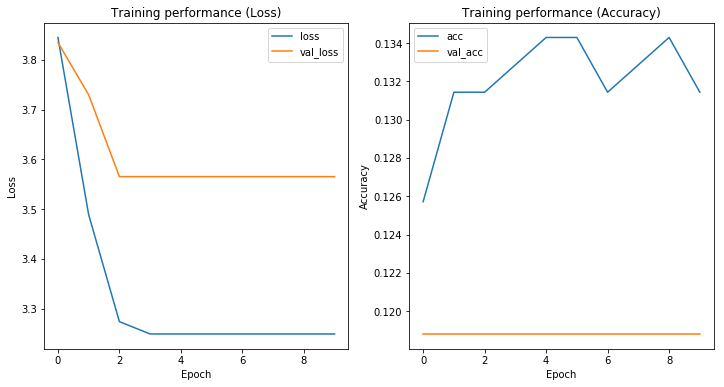

In [25]:
# 学習曲線
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('Training performance (Loss)')
ax[0].plot(history.epoch, history.history['loss'], label='loss')
ax[0].plot(history.epoch, history.history['val_loss'], label='val_loss')
ax[0].set(xlabel='Epoch', ylabel='Loss')
ax[0].legend()

ax[1].set_title('Training performance (Accuracy)')
ax[1].plot(history.epoch, history.history['acc'], label='acc')
ax[1].plot(history.epoch, history.history['val_acc'], label='val_acc')
ax[1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1].legend(loc='best')

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img
import matplotlib.pyplot as plt

In [ ]:
# datagen = ImageDataGenerator(
#            rotation_range=0,
#            width_shift_range=0,
#            height_shift_range=0,
#            shear_range=0,
#            zoom_range=0,
#            horizontal_flip=False,
#            vertical_flip=False)

In [ ]:
import matplotlib.pyplot as plt
img = x_train[0]
# plt.imshow(img)
# plt.show()

x = img_to_array(img)
x = x.reshape((1,) + x.shape)
print(x.shape)

datagen = ImageDataGenerator(horizontal_flip=True)
g = datagen.flow(x, batch_size=1)
for i in range(4):
    batches = g.next()
    
    # 画像として表示するため、４次元から3次元データにし、配列から画像にする。
    gen_img = array_to_img(batches[0])
 
    plt.subplot(2, 2, i + 1)
    plt.imshow(gen_img)
    plt.axis('off')
 
plt.show()

In [21]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from sklearn.model_selection import StratifiedKFold
import numpy

# number for CV
fold_num = 5 

batch_size = 128
num_classes = 10
epochs = 1

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# input data
X = x_train
Y = y_train


# define X-fold cross validation
kfold = StratifiedKFold(n_splits=fold_num, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X, Y):
    # create model
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

    # Fit the model
    model.fit(X[train], keras.utils.to_categorical(Y[train], num_classes),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)


    # Evaluate
    scores = model.evaluate(X[test], keras.utils.to_categorical(Y[test], num_classes), verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

11493376/11490434 [==============================] - 13s 1us/step
Epoch 1/1
47995/47995 [==============================] - 8s 175us/step - loss: 0.2744 - acc: 0.9142
acc: 95.49%
Epoch 1/1
47998/47998 [==============================] - 8s 160us/step - loss: 0.2752 - acc: 0.9147
acc: 96.20%
Epoch 1/1
48000/48000 [==============================] - 7s 154us/step - loss: 0.2721 - acc: 0.9149
acc: 96.24%
Epoch 1/1
48003/48003 [==============================] - 8s 158us/step - loss: 0.2723 - acc: 0.9162
acc: 95.61%
Epoch 1/1
48004/48004 [==============================] - 8s 162us/step - loss: 0.2769 - acc: 0.9134
acc: 95.76%
95.86% (+/- 0.31%)


In [15]:
from sklearn.svm import SVC

In [39]:
x_train=x_train.reshape(len(x_train), -1)
x_test=x_test.reshape(len(x_test), -1)

In [36]:
x_train.shape

(700, 16384)

In [37]:
model = SVC()               # インスタンス生成
model.fit(x_train, y_train) # SVM実行

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [40]:
# 予測実行
from sklearn import metrics       # 精度検証用
predicted = model.predict(x_test) # テストデータへの予測実行
metrics.accuracy_score(y_test, predicted)

0.0891089108910891

In [ ]:
#モデルの保存
json_string = model.model.to_json()
open('predict.json', 'w').write(json_string)

#重みの保存

hdf5_file = "predict.hdf5"
model.model.save_weights(hdf5_file)

In [76]:
gosanke=np.zeros(3,63)
list=[1, 152, 252, 387, 496, 650, 722]
for i in list:
    for j in range(9):
        gosanke[i+j-1] = x[i+j-1]
print()


TypeError: data type not understood